# SSE 1D Heisenberg

## I. Theory

The objective of the method is to calculate the expectation value of an observable $\hat{A}$ as follows:

$$
<\hat{A}> = \frac{1}{Z}Tr\left\{ \hat{A}e^{-\beta\hat{H}}\right\}
$$

with $Z = Tr\left\{ e^{-\beta\hat{H}}\right\}$.

The Hamiltonian is made up of a sum of non-commuting terms $\hat{H} = \sum^M_i \hat{H}_i , [\hat{H}_i,\hat{H}_j] \ne 0$ for any i, j

This trace can be rewritten in terms of a summation over the expectation values of product of Hamiltonian terms of a given order $n$ such as:

$$
Z = \sum^{\infty}_n \sum_{\{C_n\}} \frac{(-\beta)^n}{n!} Tr\left\{\prod^n_{j=1} \hat{H}_{l_j} \right\}
$$

Where $C_n$ gives all the possible combinations of product terms of bonds indices $(l_1,l_2,\dots,l_n)$ of order $n$ with $1\le l_i \le M$ where $M$ is the number of operators in the summation of the Hamiltonian terms $\hat{H}_i$.

With this reordering, the expectation value of an operator $<\hat{A}>$ can be written as:

$$
<\hat{A}> = \sum^{\infty}_n\sum_{\{C_n\}} A(C_n)W(C_n)
$$

where $A(C_n)$ and $W(C_n)$ are given by:

$$
A(C_n) =  Tr\left\{\hat{A}\prod^n_{j=1}\hat{H}_{l_j} \right\}\bigg/Tr\left\{\prod^n_{j=1}\hat{H}_{l_j} \right\} \ \text{if}\ W(C_n) \ne 0\\ 0,W(C_n) = 0
$$

$$
W(C_n) = \frac{1}{Z}\frac{(-\beta)^n}{n!}Tr\left\{\prod^n_{j=1}\hat{H}_{l_j} \right\}
$$

If the weights $W(C_n)$ are all positive, $<\hat{A}>$ can be sampled in a MC simulation and the value can be extracted.

$$
<\hat{A}> = <A(C_n)>_W
$$

The expectation value can be calculated by expanding the trace in terms of a basis representation which is chosen as a list of string with the $\hat{S}_{z_j}$ component of each site $\alpha=[S_1,S_2,\dots,S_N]$.

$$
<\hat{A}> = \frac{1}{Z}\sum_{\alpha}\sum^{L}_n \sum_{\{C_n\}} \frac{(-\beta)^n}{n!}<\alpha|\hat{A}\prod^{n}_{j=1}\hat{H}_{l_j}|\alpha>
$$

## II. Algorithm

The states are represented as a list of the per site $S^z_i$ values as follows:

$$
|\alpha> = |S^z_1,S^z_2,\dots,S^z_N>
$$

The Heisenberg Hamiltonian given below is simplified as follows

$$
\hat{H} = \sum^{B}_{b=1} \left[ \hat{S}^z_{i(b)}\cdot\hat{S}^z_{j(b)} + \frac{1}{2} \left( S^+_{i(b)}\cdot S^-_{j(b)} + S^-_{i(b)}\cdot S^+_{j(b)} \right) \right]
$$

The two parts of the Hamiltonian are broken down and shifted in order to make all the expectation values non-negative.

$$
\hat{H}_{1,b} = \frac{1}{4} - \hat{S}^z_{i(b)}\cdot\hat{S}^z_{j(b)} \\ \hat{H}_{2,b} = \frac{1}{2} \left( S^+_{i(b)}\cdot S^-_{j(b)} + S^-_{i(b)}\cdot S^+_{j(b)} \right) 
$$

Therefore, the Hamiltonian is written as:

$$
\hat{H} = -\sum^B_{b=1}\sum^2_a \left[ \hat{H}_{a,b} \right]
$$

with a phase convention for the off-diagonal operators.

----
__Important Note__

The full Hamiltonian is different from the usual Heisenberg Hamiltonian.

In fact the _shifted_ Hamiltonian used here is related to the Heisenberg Hamiltonian:

$$
\hat{H}_{heis} = \sum^{B}_{b=1} \left[ \hat{S}^z_{i(b)}\cdot\hat{S}^z_{j(b)} + \frac{1}{2} \left( S^+_{i(b)}\cdot S^-_{j(b)} + S^-_{i(b)}\cdot S^+_{j(b)} \right) \right]
$$


$$
\hat{H}_{SSE} = \hat{H}_{heis} + \frac{JB}{4}
$$

Where $B$ is the Number of bonds in the Hamiltonian.

----

The SSE operator products in the partition function are given by
$$
\prod^M_p \hat{H}_{a(p),b(p)}
$$

The lists $a(p)$ and $b(p)$ are stored in a vector which give the operators acting at each time step $p$

and the operator string is given by $opstring(p) = 2 b(p) + a(p) - 1$ with the identity represented by $0$.

The configuration is stored in the spin variable which contains $spin[i] = 2S^z_i$

The connection of pair of spins to a bond is stored in $bsites$ which is a $MaxM x 2$ matrix with $bsites[b,1]$ giving the ms of the 1st site and $bsites[b,2]$ giving the ms of the second site.


### a.) The data structures

In [322]:
Nsites = 8
MaxM = M = 12
n=0
spins = 1.0*[1; 1; -1; -1; 1; -1; 1; -1]
a = zeros(Int,MaxM)
a[1]=1
a[3]=2
a[4]=2
a[5]=1
a[8]=1
a[9]=2
a[11]=2
a[12]=1
b = zeros(Int,MaxM)
b[1]=2
b[3]=4
b[4]=6
b[5]=3
b[8]=2
b[9]=6
b[11]=4
b[12]=7
opstring = zeros(Int,MaxM)
bsites = makeBsites(Nsites)
buildOpstring!(opstring,a,b)
print("i  \t a \t b \topstring\n\n")
for i in 1:MaxM
    print(i,">","\t",a[i],"\t",b[i],"\t",opstring[i],"\n")
end

i  	 a 	 b 	opstring

1>	1	2	4
2>	0	0	0
3>	2	4	9
4>	2	6	13
5>	1	3	6
6>	0	0	0
7>	0	0	0
8>	1	2	4
9>	2	6	13
10>	0	0	0
11>	2	4	9
12>	1	7	14


### b.) Visualize SSE config

An example of an SSE configuration and propagated states for $M=12$ and $8$ sites is shown below.

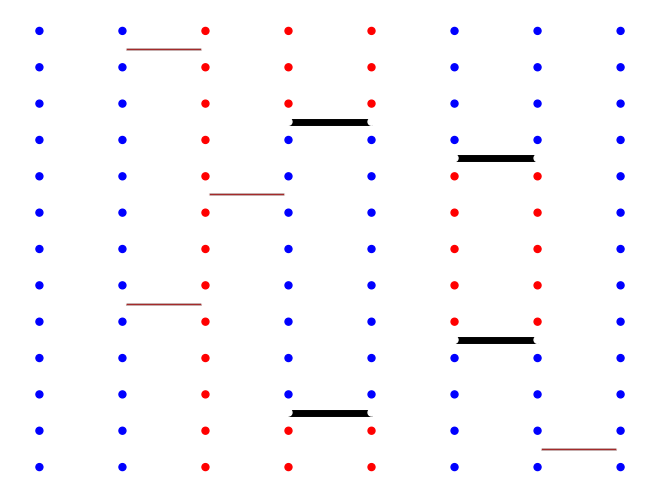

    -1.0       -1.0       1.0       1.0       1.0       -1.0       -1.0       -1.0       

In [321]:
drawSSEConfig(Nsites,M,a,b,spin);

### b.) Make vertex list

The most important function to build then is the loop calculation algorithm which gives the list of all the closed loops for a given SSE configuration.

In [324]:
vfirst,vlast,vlist = makeVertexListOperatorBased(a,b,opstring,Nsites,M,bsites)
printVertexVector(vlist,M,Nsites)

l = 	  0			  1			  2			  3			  

	 [1]	31		 [2]	32		 [3]	29		 [4]	17	
	 [5]	-1		 [6]	-1		 [7]	-1		 [8]	-1	
	 [9]	43		 [10]	44		 [11]	18		 [12]	42	
	 [13]	35		 [14]	47		 [15]	33		 [16]	34	
	 [17]	4		 [18]	11		 [19]	30		 [20]	41	
	 [21]	-1		 [22]	-1		 [23]	-1		 [24]	-1	
	 [25]	-1		 [26]	-1		 [27]	-1		 [28]	-1	
	 [29]	3		 [30]	19		 [31]	1		 [32]	2	
	 [33]	15		 [34]	16		 [35]	13		 [36]	45	
	 [37]	-1		 [38]	-1		 [39]	-1		 [40]	-1	
	 [41]	20		 [42]	12		 [43]	9		 [44]	10	
	 [45]	36		 [46]	48		 [47]	14		 [48]	46	


# 1.) Diagonal Update

The first type of update is the diagonal update where a $\hat{S}^z_b(p)$ operator is put for a randomly chosen bond $b$ and this is carried out for each time dimension $p$. 

The condition for adding a diagonal operator $\hat{S}^z_b(p)$ is that the two spins making up the bond $b$ i.e. $S_{i(b)}$ and $S_{j(b)}$ should be unequal i.e. the spins should be anti-parallel.

## 2.) Off diagonal update

The off diagonal update involves updating two off diagonal operators $S^+_{i(b)}\cdot S^-_{j(b)}$ at once.

## 3.) Loop update

Loop update involves long range changes where a loop is constructed and inverted with probability $\frac{1}{2}$.

# Final Algorithm

## 1. Put everything together

Combining all the elements we write the final algorithm which has the following steps:

    1. A cycle of diagonal updates
    2. Construct vertexlist
    3. Flip all loops with prob 1/2
    4. map vertexlist back to opstring and spin
 

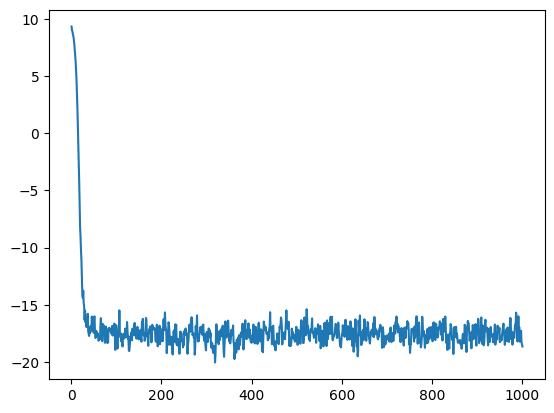


-17.501217564870256


In [342]:
using TimerOutputs
using Statistics, Distributions, StatsPlots

# Initialize parameters

# temperature
β = 50

# number of sites
Nsites = 40

# starting number of max op string
MaxM = 4000
M = 40 #Nsites*2
n = 0


a = zeros(Int,MaxM)
b = zeros(Int,MaxM)
opstring = zeros(Int,MaxM)

spins = [(i-0.5)/abs(i-0.5) for i in rand(Nsites)]
# Check for unlikely cases
# if sum(abs.(spin)) == Nsites
#     spins[Nsites÷2] *= spins[Nsites÷2]
# end
phase = 1
# for i in 1:Nsites
#     spin[i] = phase*-1
#     phase *= -1
# end
bsites = makeBsites(Nsites)
#print("spin = ",spins,"\n")

maxMCsteps = 1000
# ratio for MaxM vs n
α = 3

to = TimerOutput()

mlist = []
counterlist = []
countn = []
mcsteps = 0
while mcsteps < maxMCsteps
    
          
    # 1. do diagonal updates
    n = @timeit to "diag update"  diagUpdate!(a,b,opstring,spins,bsites,n,M,Nsites,β)
    
    if n <= 0
        continue
    end
        
    
    if M - n < n/α 
        prevM = M
        M = trunc(Int,n + n/α)
    end
    
    push!(mlist,M)
    push!(countn,-n/(β) + ((Nsites-1)/4))
    
        
    # 2. construct vertexlist
    vfirst,vlast,vlist = @timeit to "make vertex list" makeVertexListOperatorBased(a,b,opstring,Nsites,M,bsites)
  
    mcsteps += 1   
    push!(counterlist,mcsteps)
 
    # 4. do loop update
    @timeit to "loop update" loopUpdateSimple!(vlist,vfirst,a,opstring,spins)
    
   if !@timeit to "check update" checkConsistency(a,b,bsites,spins,Nsites)
       break;
   end

end

# Print the timing info
#show(to; allocations = false)

PyPlot.plot(counterlist, countn);
meann = mean(countn[end-500:end])
print("\n",meann,"\n")

## 3.) E vs $\beta$

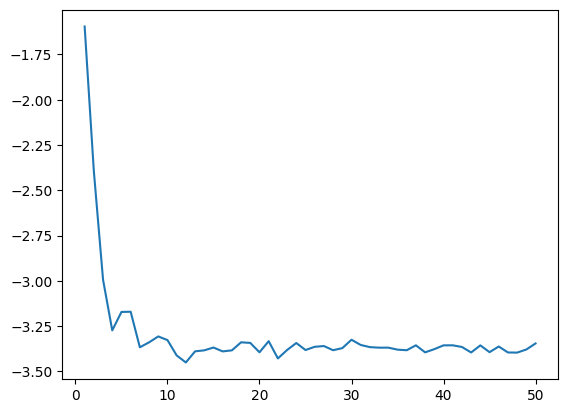

In [340]:
listmu = []
total=0
for i in 1:1.0:50
#    print(i,"\t")
    e = simulateSSE(i*1.0)
    push!(listmu,e)
    total+=1
end
PyPlot.plot(1:total,listmu);

## 4.) MC simulate

In [333]:
using Statistics, Distributions, StatsPlots

"""
Do the mc simulation and get 
"""
function simulateSSE(β)
    # Initialize parameters

    # number of sites
    Nsites = 8

    # starting number of max op string
    MaxM = 4000
    M = 40 #Nsites*2
    n = 0


    a = zeros(Int,MaxM)
    b = zeros(Int,MaxM)
    opstring = zeros(Int,MaxM)

    spins = [(i-0.5)/abs(i-0.5) for i in rand(Nsites)]
    # Check for unlikely cases
    # if sum(abs.(spin)) == Nsites
    #     spins[Nsites÷2] *= spins[Nsites÷2]
    # end
    phase = 1
    # for i in 1:Nsites
    #     spin[i] = phase*-1
    #     phase *= -1
    # end
    bsites = makeBsites(Nsites)
    #print("spin = ",spins,"\n")

    maxMCsteps = 1000
    # ratio for MaxM vs n
    α = 3

    mlist = []
    counterlist = []
    countn = []
    mcsteps = 0
    while mcsteps < maxMCsteps
          
        # 1. do diagonal updates
        n = diagUpdate!(a,b,opstring,spins,bsites,n,M,Nsites,β)

        if n <= 0
            continue
        end


        if M - n < n/α 
            prevM = M
            M = trunc(Int,n + n/α)
        end

        push!(mlist,M)
        push!(countn,-n/(β) + ((Nsites-1)/4))


        # 2. construct vertexlist
        vfirst,vlast,vlist = makeVertexListOperatorBased(a,b,opstring,Nsites,M,bsites)

        mcsteps += 1   
        push!(counterlist,mcsteps)

        # 4. do loop update
        loopUpdateSimple!(vlist,vfirst,a,opstring,spins)


    end

    # calculate normal distribution params
    return(mean(countn[end-500:end]))
end

simulateSSE

----------

# Function definitions

## 1.) buildOpstring

In [5]:
"""
Build opstring given the operator list a and b
"""
function buildOpstring!(opstring,a,b)
    dim = length(a);
    eye = ones(dim);
    idxa = a .== 0;
    idxb = b .== 0;
    eye[idxa] .= 0;
    opstring .= 2 * b + a - eye;
end

buildOpstring!

## Flipbit function

In [129]:
"""
    flipbit(x,i)
flips bit of x in the ith position
"""
function flipbit(x,n)
    return(x ⊻ 2^(n-1))
end

flipbit

## 2.) Printmatrix

In [7]:
function printmat(mat)
    print("\n")
    show(Base.stdout, MIME"text/plain"(),mat)
    print("\n")
end

printmat (generic function with 1 method)

## 3.) Bsites

In [2]:
"""
Make Bsites for 1D Heisenberg\n
Nsites - the number of sites
"""
function makeBsites(Nsites)
    bsites = zeros(Int,Nsites-1,2)
    bsites[:,1] = 1:Nsites-1
    bsites[:,2] = 2:Nsites
    return bsites
end


makeBsites

## 4.) Make graph with a given a and b

In [195]:
using ImageView, Images, TestImages
using PyPlot
using PyCall

"""
Draw SSE configuration with given
a(p) and b(p) operators.
Nsites - number of sites
MaxM - number of time steps
a - the op type
b - the bond id for each op
spin - the configuration list
"""
function drawSSEConfig(Nsites,MaxM,a,b,spin)
    # draw the given opstring


    nx = pyimport("networkx")

    m=2MaxM + 1
    n=Nsites

    G = nx.grid_2d_graph(n,m); # n, m grid 
    pos = Dict( (n, n) for n in G.nodes() );

    color_map=[]
    countcolor=1
    for i in 0:n-1
        for j in 0:m-1
            if countcolor%2 == 0
                push!(color_map,"white")
            else
                push!(color_map,"blue")
            end
            countcolor+=1
        end
        countcolor+=1
    end

    for j in 0:m-2
        for i in 0:n-2
            G.remove_edge((i,j),(i+1,j))
            G.remove_edge((i,j),(i,j+1))
        end
        G.remove_edge((n-1,j),(n-1,j+1))
    end
    for i in 0:n-2
        G.remove_edge((i,m-1),(i+1,m-1))
    end

    # make the ops by looping over the imaginary time axis
    # use a for the time direction and b for the space dimension
    #G.add_edge((0,m-2),(1,m-2))
    width=[]
    edge_color=[]
    for i in 1:MaxM
        if a[i] != 0 && b[i] < Nsites
            J = m-2*i
            I = trunc(Int,b[i]-1)
 #           print(I,"\t",J,"\n")
            if a[i]==1
                G.add_edge((I,J),(I+1,J))
                push!(width,1.0)
                push!(edge_color,"brown")
            else
                G.add_edge((I,J),(I+1,J))
                push!(width,5.0)
                push!(edge_color,"black")
            end
        end
    end


    edges=[]
    edge_color=[]
    width=[]
    for (i,edge) in enumerate(G.edges)
    #    edges[edge]=i
        push!(edges,edge)
        J = edge[2][1]
        I = trunc(Int,MaxM-(edge[2][2]-1)/2)
        if a[I]==2
            push!(width,5.0)
            push!(edge_color,"black")
        else
            push!(width,1.0)
            push!(edge_color,"brown")
        end
    end

    for j in 1:MaxM    
        J = m-2*(j-1)        
        for i in 0:n-1
            I=i
    #        print(J," ",I,"\t",J*(m-1)+I,"\n")
            if spin[i+1] == 1
                color_map[I*(m) + J] = "red"
            else
                color_map[i*(m) + J] = "blue"
            end
        end
        if a[j]==2
            for i in 0:n-1
                if b[j]==i+1
                    spin[i+1]*=-1
                    spin[i+2]*=-1
                end
            end 
        end
    end
    for i in 0:n-1
            J=m-2*(MaxM)
            I=i
            if spin[i+1] == 1
                color_map[I*(m) + J] = "red"
            else
                color_map[i*(m) + J] = "blue"
            end
     end

    print("    ")
    for i in 1:Nsites
        print(spin[i],"       ")
    end

    nx.draw(G,pos,node_color=color_map, font_color="white",node_size=25);
    nx.draw_networkx_edges(G,pos,edgelist=edges,width=width,edge_color=edge_color);
end

┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1273
  likely near /Users/chilkuri/.julia/packages/Images/RUVAg/src/Images.jl:60
┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/chilkuri/.julia/packages/PyPlot/4wzW1/src/init.jl:192


drawSSEConfig

## 6.) Print vertex list


In [6]:
"""
Print a given vertex list
vlist - the vertex list
"""
function printVertexList(vlist)  
    MaxM = size(vlist)[1]
    print("l = \t  ")
    for i in 1:4
        print(i,"\t\t\t  ")
    end
    print("\n\n")
    for i in 1:MaxM
        for j in 1:4
            print("\t [",4*(i-1) + j,"]","\t",vlist[i,j],"\t")
        end
        print("\n")
    end
end

printVertexList

In [30]:
function printVertexVector(xv,M,Nsites)
    print("l = \t  ")
    for i in 0:3
        print(i,"\t\t\t  ")
    end
    print("\n\n")
    for i in 1:M
        for j in 1:4
            print("\t [",4*(i-1) + j,"]","\t",xv[4*(i-1) + j],"\t")
        end
        print("\n")
    end
end

printVertexVector (generic function with 1 method)

## 7.) Diagonal Update

In [287]:
import Random

"""
Get diag update addition probability
"""
function diagProbAdd(B,β,M,n)
    return (min((B*β/2)/(M-n),1))
end

"""
Get diag update removal probability
"""
function diagProbRemove(B,β,M,n)
    return (min((M-n+1)/(B*β/2),1))
end

#Random.seed!(1234)
"""
Return a random number [0,1)
"""
function getRand()
    return rand()
end

"""
The function that implements diagonal update\n
a - bond type
b - bond id
opstring - combind bond type and id
spin - the spin configuration
bsites - site list for each bond
MaxM - the time dimension
Nsites - number of sites
β - time step
"""
function diagUpdate!(a,b,opstring,spin,bsites,n,MaxM,Nsites,β)
    B = Nsites-1
    for i in 1:MaxM
        bnd = rand(1:B)
        spin1 = spin[bsites[bnd,1]]
        spin2 = spin[bsites[bnd,2]]
        if a[i] == 0
            if spin1 == spin2
                continue
            end
            probAc = diagProbAdd(B,β,MaxM,n)
#             print(probAc,"\n")
            rnd = getRand()
            if rnd < probAc
                # accept update
                b[i] = bnd
                a[i] = 1
                opstring[i] = 2 * bnd
                n += 1
            end
        elseif a[i] == 1
            probRm = diagProbRemove(B,β,MaxM,n)
            rnd = getRand()
#             print(probRm,"\n")
            if rnd < probRm
                # remove bond
                b[i] = 0
                a[i] = 0
                opstring[i] = 0
                n -= 1
            end
        end
        if a[i] == 2
            # propagate the state
            spin[bsites[b[i],1]] *=-1
            spin[bsites[b[i],2]] *=-1
        end
    end
    return n
end

diagUpdate!

## 9.) Off diagonal pair update

In [9]:
"""
Generate the list of all the pair of operators type 2 for 
the off-diagonal update
looplist - list of loops
a - list of bond types
b - list of bond ids
opstring - opstring
bsites - spin ids for each bond
"""
function offdiagonalUpdate!(looplist,a,b,opstring,bsites)
    
    lpmove = Dict()
    lpmove[0]=4
    lpmove[1]=1
    lpmove[2]=2
    lpmove[3]=3
    
    opinvert = Dict()
    opinvert[1.0] = 2.0
    opinvert[2.0] = 1.0
    
    nloops = size(looplist)
    loopdims = map(x->size(x)[1],looplist)
    idxoffdiagloops = findall(x->x==5,loopdims)
    numoffdiagloops = size(idxoffdiagloops)[1]
    for i in 1:numoffdiagloops
        id = idxoffdiagloops[i]
        v1  = looplist[id][1]
        v2  = looplist[id][2]
        lp1 = lpmove[v1%4]
        p1  = trunc(Int,1 + (v1-lp1)/4)        
        lp2 = lpmove[v2%4]
        p2  = trunc(Int,1 + (v2-lp2)/4)        
#        print(i,"\t",v1,"\t",v2,"\n")
        if v1 > v2
            # winded through periodic edges
            # need to change spin configuration
            a[p1] = opinvert[a[p1]]
            a[p2] = opinvert[a[p2]]            
            opstring[p1] = 2*b[p1] + a[p1] - 1
            opstring[p2] = 2*b[p2] + a[p2] - 1
            b1 = trunc(Int,b[p1])
            b2 = trunc(Int,b[p2])
            if b1 != b2
                print("Something is wrong in off diag up b1 != b2\n")
            end
            s1 = trunc(Int,bsites[b1,1])
            s2 = trunc(Int,bsites[b1,2])
            spin[s1] *= -1
            spin[s2] *= -1
        else
            # direct loop 
            # no need to change spin configurations
            a[p1] = opinvert[a[p1]]
            a[p2] = opinvert[a[p2]]
            opstring[p1] = 2*b[p1] + a[p1] - 1
            opstring[p2] = 2*b[p2] + a[p2] - 1
        end       
    end
end

offdiagonalUpdate!

## 13.) Exists in vector function

In [13]:
"""
Check if an element exists in vector
vec - vector
x - element
"""
function isinvec(vec,x)
    if size(findall(y->y==x,vec))[1] >0
        return true
    else
        return false
    end
end

isinvec

## 14.) Check consistency

In [243]:
"""
Check if configuration is consistent.
"""
function checkConsistency(a,b,bsites,spin,Nsites)
    bndids = findall(x->x>0,b)
    nbndsd = length(bndids)
    for i in 1:nbndsd
        bnd = b[bndids[i]]
        s1 = spin[bsites[bnd,1]]
        s2 = spin[bsites[bnd,2]]
        if s1 == s2
            print("id= ",bndids[i],"Bond = ",bnd,"\n")
            print("Inconsistent confiugration\n")
            return(false)
        end
        if a[bndids[i]] == 2
            # propagate the state
            spin[bsites[bnd,1]] *=-1
            spin[bsites[bnd,2]] *=-1
        end
    end
    return(true)
end

checkConsistency

## 15. Vertex List function

In [150]:
"""
   makeVertexList()
Simple algorithm to make the vertexlist
according to looping over operators
"""
function makeVertexListOperatorBased(a,b,opstring,Nsites,M,bsites)
    xv     = -1*ones(Int,M*Nsites)
    vfirst = -1*ones(Int,Nsites)
    vlast  = -1*ones(Int,Nsites)
    opidxs = findall(x->x>0,a)
    
    # Set the direct links
    for i in opidxs
        
        # bond id
        bnd = b[i]
        p = i-1
        
        # 1st and 2nd spins
        s1  = bsites[bnd,1]
        s2  = bsites[bnd,2]
        
        # vertix ids
        v0 = 4*(p) 
        v1 = vlast[s1]
        v2 = vlast[s2]
        
        # First spin
        if v1 != -1
            xv[v1+1] = v0+1
            xv[v0+1] = v1+1
        else
            vfirst[s1] = v0
        end
        
        # Second spin
        if v2 != -1
            xv[v2+1] = v0+1+1
            xv[v0+1+1] = v2+1
        else
            vfirst[s2] = v0 + 1
        end
        
        vlast[s1] = v0 + 2
        vlast[s2] = v0 + 3
    end
    
    # Set the winding links
    for i in 1:Nsites
        v1 = vlast[i]
        v2 = vfirst[i]
        if v1 != -1 && v2 != -1
            xv[v1+1] = v2+1
            xv[v2+1] = v1+1
        end
    end
    return(vfirst,vlast,xv)
end


makeVertexListOperatorBased

## 16.) Loop update

In [239]:
"""
    loopUpdateSimple(xv,vfirst,vlast,b)
Updates the operator types in b according to
loops given by xv.
"""
function loopUpdateSimple!(xv,vfirst,a,opstring,spins)

    M = size(a)[1]
    opidxs = findall(x->x>0,a)
    dimxv = size(xv)[1]
    for v0 in 1:2:dimxv
        if xv[v0] < 0 
            continue
        end

        # Traverse
        rand = getRand()
#        print("Starting loop: (",rand<1/2,") ",v0,"\n")
        if rand < 1/2
            # traverse no flip
            flipit = false
            traverseLoop(v0,flipit,opstring,xv)
        else
            # traverse and flip
            flipit = true
            traverseLoop(v0,flipit,opstring,xv)
        end
        
#        printVertexVector(xv,M,Nsites)
    end
    
    # update spins
    for i in 1:Nsites
        v = vfirst[i]
        if v == -1
            # flip spin
            rand = getRand()
            if rand < 1/2
                spins[i] *= -1
            end
        else
            v += 1
            # check if loop is flipped
            if xv[v] == -2
                spins[i] *= -1
            end
        end
    end
    
    # Update a 
    M = size(opstring)[1]
#    print(opstring,"\n")
    for i in 1:M
        if opstring[i] > 0
            a[i] = (opstring[i]%2) + 1
        end
    end
#    print(a,"\n")
    return 0
end


"""
   traverseLoop(v0,flipit,b,xv)
Traverses a vertex list and marks
visited vertices, flips bonds conditionally.
"""
function traverseLoop(v0,flipit,opstring,xv)
    v = v0
    while true

        # Flip bit
        if flipit
            p=((v-1)÷4) + 1
#            print("\t---> ",p," ")
            opstring[p] = flipbit(opstring[p],1)
            xv[v]=-2            
        else
            xv[v]=-1
        end
        
        # Get next bit
        vp = flipbit(v-1,1)+1
#        print(v," ",vp,"\n")
        v = xv[vp]
        # Flip bit
        if flipit
            xv[vp]=-2            
        else
            xv[vp]=-1
        end
        
        # Check for loop closure
        if v == v0
            break
        end
    end
end

traverseLoop